# Titanic Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Task-1: Load dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## task- 2: data cleaning

In [6]:
df.info()

df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


<Axes: xlabel='age', ylabel='Count'>

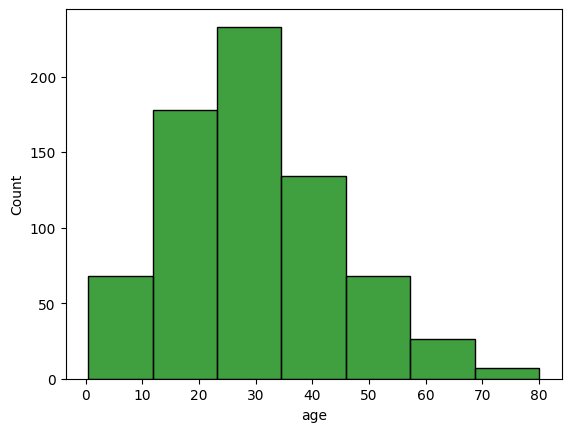

In [16]:
sns.histplot(x='age',bins=7,data=df, color='green' )



<Axes: xlabel='pclass', ylabel='count'>

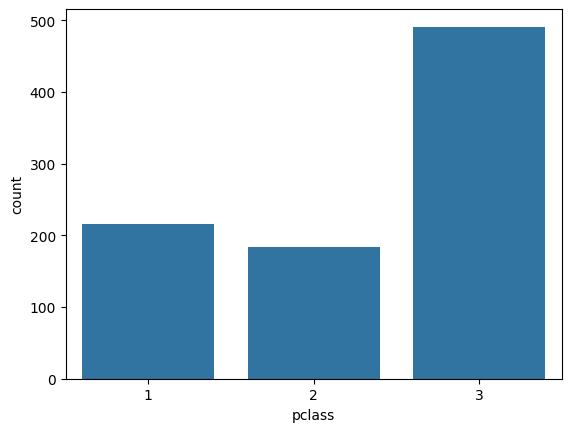

In [13]:
sns.countplot(x='pclass', data=df)

## Task 4: Biveriate

In [33]:
Survival_Rate = df.groupby('sex')['survived'].mean()

Survival_Rate

,survived
sex,
female,0.742038
male,0.188908


<Axes: xlabel='pclass', ylabel='survived'>

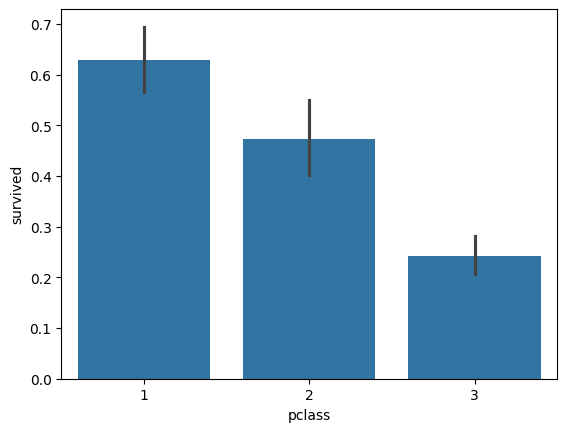

In [34]:
sns.barplot(x='pclass', y='survived', data=df)


<Axes: xlabel='sex', ylabel='survived'>

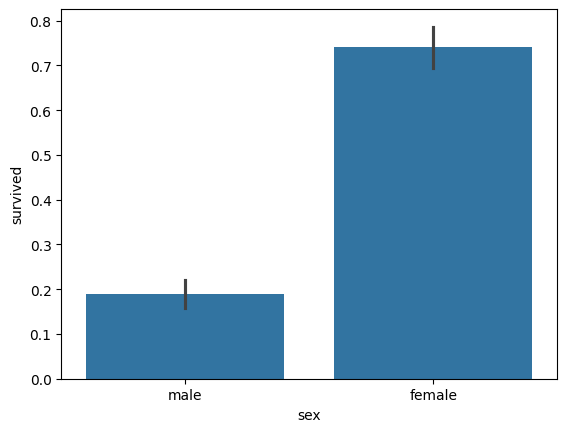

In [41]:
sns.barplot(x='sex', y='survived', data=df)


<Axes: xlabel='age', ylabel='Count'>

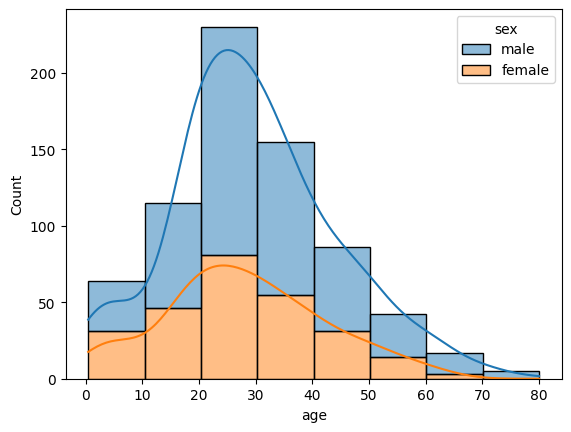

In [49]:
sns.histplot(x='age', data=df, hue='sex', bins=8, multiple='stack', kde='true')

<Axes: xlabel='age', ylabel='Count'>

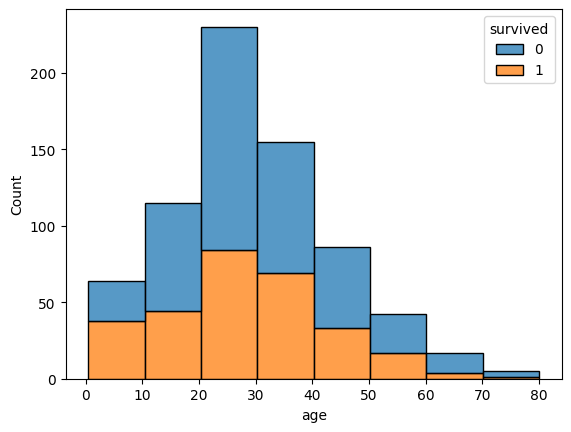

In [47]:
sns.histplot(x='age', data=df, hue='survived', bins=8, multiple='stack')


In [51]:
## Create new column
df['Family Size'] = df['parch'] + df['sibsp'] + 1

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Survival_Rate,Family Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN,1


<Axes: xlabel='Family Size', ylabel='survived'>

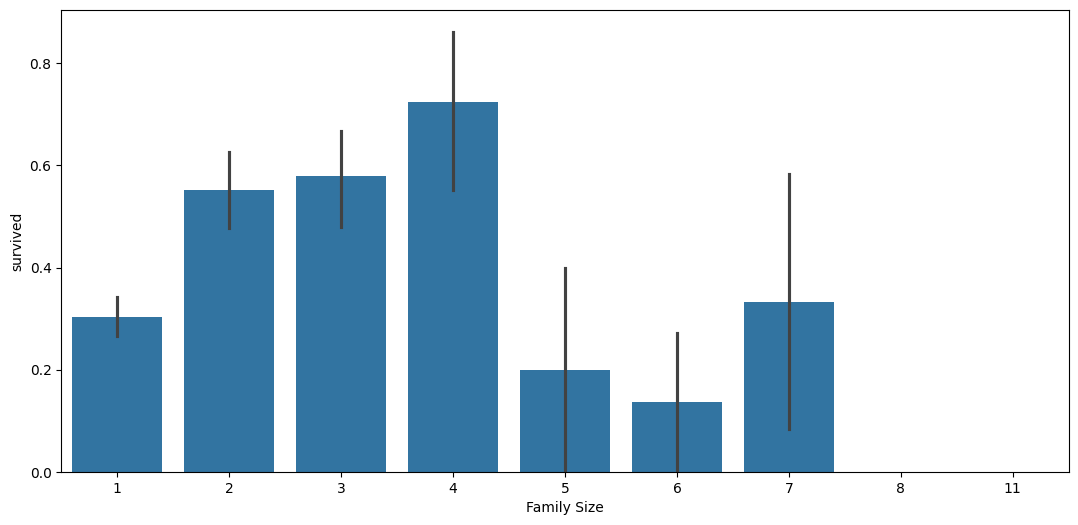

In [58]:
plt.figure(figsize=(13,6))
sns.barplot(x='Family Size', y='survived', data=df)

## Correlation

<Axes: >

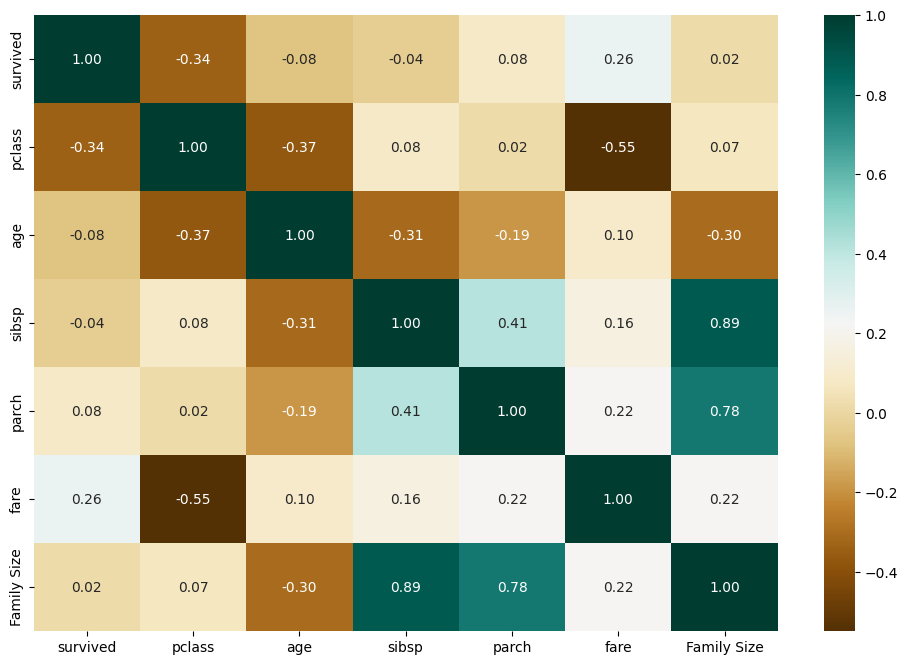

In [70]:

plt.figure(figsize=(12,8))
num_df = df.select_dtypes(include='number').drop(columns=['Survival_Rate'])
num_df.corr()
sns.heatmap(num_df.corr(), annot=True, cmap='BrBG', fmt=".2f")

# **Summerize the EDA**


*   we see female are survived more than male so sex is an important matrix
*   we see lower age group survived it means Child survived much than seniors
*  1st class passengers survived more than 2nd and 3rd so it's an important matrix

